![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

In [1]:
%tensorflow_version 2.x]
import tensorflow
tensorflow.__version__

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x]`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


'2.3.0'

In [2]:
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [5]:
import numpy as np
data = np.load ('/content/drive/My Drive/GL dataset/images.npy', allow_pickle='True')

### Check one sample from the loaded "images.npy" file  (3 marks)
- Hint: print data[10][1] 

In [6]:
print (data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [7]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [8]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Split the data into training and testing (3 marks)
- 400 images in training
- 9 images in testing data

Training data

In [9]:
X_train = X[:400]
y_train = masks[:400]

Testing data

In [10]:
X_test = X[400:]
y_test = masks[400:]

### Print a sample training image, image array and its mask (3 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.1686275   0.1686275   0.09019613]
  [ 0.22352946  0.22352946  0.14509809]
  [ 0.25490201  0.25490201  0.17647064]
  ...
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.14509809  0.12156868  0.06666672]]

 [[ 0.18431377  0.18431377  0.10588241]
  [ 0.22352946  0.22352946  0.14509809]
  [ 0.27058828  0.27058828  0.19215691]
  ...
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.15294123  0.12941182  0.07450986]]

 [[ 0.17647064  0.17647064  0.10588241]
  [ 0.21568632  0.21568632  0.14509809]
  [ 0.27058828  0.27058828  0.20000005]
  ...
  [ 0.15294123  0.12941182  0.07450986]
  [ 0.15294123  0.12941182  0.07450986]
  [ 0.14509809  0.12156868  0.06666672]]

 ...

 [[-0.00392157  0.00392163 -0.04313725]
  [-0.00392157  0.01176476 -0.04313725]
  [ 0.04313731  0.05098045  0.00392163]
  ...
  [-0.38039213 -0.38039213 -0.40392154]
  [-0.43529409 -0.4588235  -0.52941179]
  [-0.45098037 -0.49019605 -0.53725493]]

 [

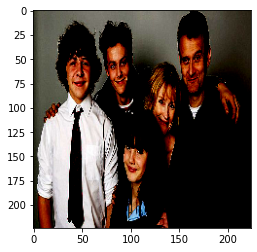

In [11]:
import matplotlib.pyplot as plt
print (X_train[6])
plt.imshow (X_train[6])

Print the mask

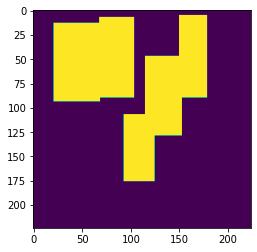

In [12]:
plt.imshow (y_train[6])

## Create the model (7 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [13]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
  
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
    x = UpSampling2D()(x)

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function (2 marks)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [14]:
model = create_model(False)

17227776/17225924 [==============================] - 0s 0us/step


### Print model summary (2 marks)

In [15]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

### Define dice coefficient function (3 marks)
- Create a function to calculate dice coefficient


In [16]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function (3 marks)

In [17]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", verbose=1, save_best_only=True, save_weights_only=True)

stop = EarlyStopping(patience=5)

reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6, verbose=1)

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [31]:
model.fit(X_train, y_train, epochs=15, batch_size=1, verbose=1, validation_data=(X_test, y_test), callbacks=[checkpoint, stop, reduce_lr])

Epoch 1/15
398/400 [============================>.] - ETA: 0s - loss: 0.8115 - dice_coefficient: 0.5946WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0029s vs `on_test_batch_end` time: 0.0140s). Check your callbacks.

Epoch 00001: val_loss improved from 0.83989 to 0.83783, saving model to model-0.81.h5
400/400 [==============================] - 10s 25ms/step - loss: 0.8110 - dice_coefficient: 0.5949 - val_loss: 0.8378 - val_dice_coefficient: 0.5497
Epoch 2/15
399/400 [============================>.] - ETA: 0s - loss: 0.8053 - dice_coefficient: 0.5979
Epoch 00002: val_loss improved from 0.83783 to 0.82942, saving model to model-0.80.h5
400/400 [==============================] - 10s 24ms/step - loss: 0.8049 - dice_coefficient: 0.5981 - val_loss: 0.8294 - val_dice_coefficient: 0.5492
Epoch 3/15
399/400 [============================>.] - ETA: 0s - loss: 0.7984 - dice_coefficient: 0.6004
Epoch 00003: val_loss improved from 0.82942 t

### Get the predicted mask for a test image   (3 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


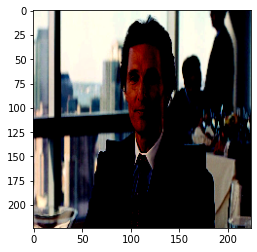

In [32]:
plt.imshow (X_test[3])

Show original mask for test image

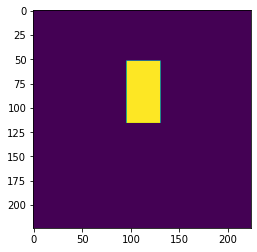

In [33]:
plt.imshow (y_test[3])

Predict the mask on the test image

1/1 [==============================] - 0s 164ms/step


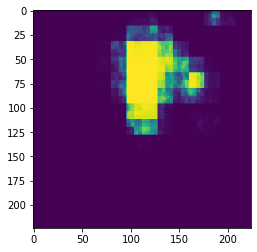

In [34]:
y_pred = model.predict(X_test,verbose=1)
plt.imshow (y_pred[3])

### Impose the mask on the test image (3 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


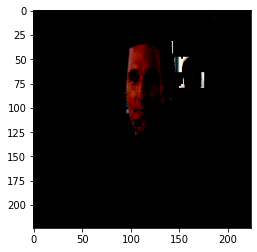

In [35]:
unscaled = (X_test[3])
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([X_test[3]]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]

out_image = image2

plt.imshow(out_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


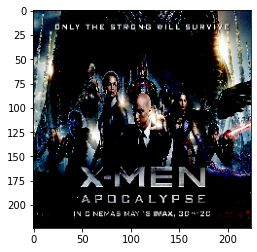

In [36]:
plt.imshow (X_test[8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


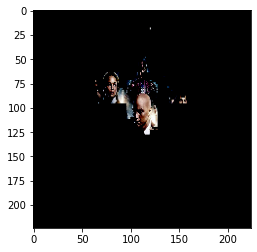

In [37]:
unscaled = (X_test[8])
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([X_test[8]]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]

out_image = image2

plt.imshow(out_image)